In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('../../Old/CS 250 Data/Fish.csv')
data.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


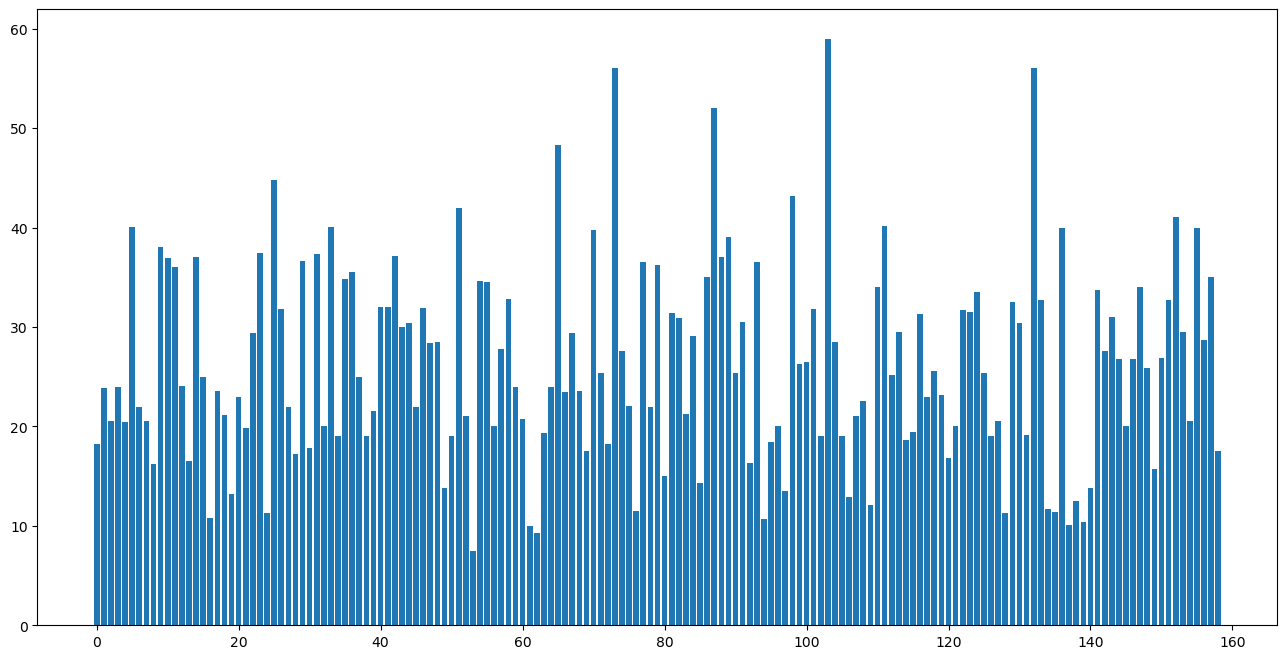

In [13]:
data = data.sample(frac=1.0)
fig = plt.figure(figsize=(16,8))
plt.bar(range(data.shape[0]),data.Length1)
plt.show()

In [14]:
train_part = 0.7
species = data.Species
species_count = species.value_counts()
species = np.array(species)
alldata = np.array(data)
alldata = alldata[:,1:]
alldata

array([[85.0, 18.2, 20.0, 21.0, 5.082, 2.772],
       [340.0, 23.9, 26.5, 31.1, 12.3778, 4.6961],
       [150.0, 20.5, 22.5, 24.0, 6.792, 3.624],
       [290.0, 24.0, 26.3, 31.2, 12.48, 4.3056],
       [150.0, 20.4, 22.0, 24.7, 5.8045, 3.7544],
       [540.0, 40.1, 43.0, 45.8, 7.786, 5.1296],
       [225.0, 22.0, 24.0, 25.5, 7.293, 3.723],
       [160.0, 20.5, 22.5, 25.3, 7.0334, 3.8203],
       [100.0, 16.2, 18.0, 19.2, 5.2224, 3.3216],
       [950.0, 38.0, 41.0, 46.5, 17.6235, 6.3705],
       [850.0, 36.9, 40.0, 42.3, 11.9286, 7.1064],
       [345.0, 36.0, 38.5, 41.0, 6.396, 3.977],
       [270.0, 24.1, 26.5, 29.3, 8.1454, 4.2485],
       [69.0, 16.5, 18.2, 20.3, 5.2983, 2.8217],
       [900.0, 37.0, 40.0, 42.5, 11.73, 7.225],
       [272.0, 25.0, 27.0, 30.6, 8.568, 4.7736],
       [8.7, 10.8, 11.3, 12.6, 1.9782, 1.2852],
       [270.0, 23.6, 26.0, 28.7, 8.3804, 4.2476],
       [160.0, 21.1, 22.5, 25.0, 6.4, 3.8],
       [19.7, 13.2, 14.3, 15.2, 2.8728, 2.0672],
       [273.0, 23.0, 

In [15]:
traindata = []
testdata = []
species
row = 0
for species in species_count.keys():
    traincount = np.int16(train_part * species_count[species])
    testcount = species_count[species] - traincount
    for i in range(traincount):
        traindata.append(alldata[row,:])
        row = row + 1
    for j in range(testcount):
        testdata.append(alldata[row,:])
        row = row + 1
    
traindata = np.array(traindata)
testdata = np.array(testdata)

print(traindata.shape,testdata.shape)
        

(108, 6) (51, 6)


In [17]:
X_train = traindata[:,1:]
y_train = traindata[:,0]
X_test = testdata[:,1:]
y_test = testdata[:,0]

Coefficients: 
 [ 73.3703338  -30.84758054 -14.75873763  19.5746848   32.98411757]
Root mean squared error: 119.73
Variance score: 0.89


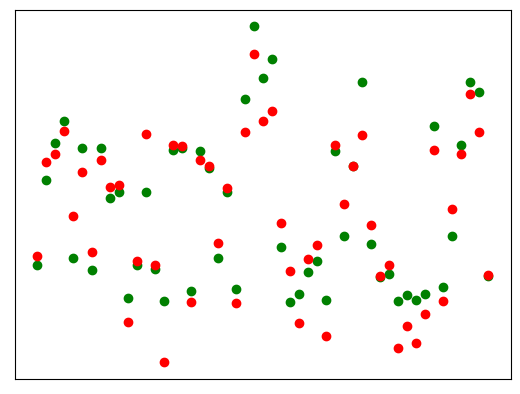

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
# Plot outputs
plt.scatter(range(len(y_test)), y_test, color='green')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.xticks(())
plt.yticks(())
plt.show()

Coefficients: 
 [ 73.3703338  -30.84758054 -14.75873763  19.5746848   32.98411757]
Root mean squared error: 123.22
Variance score: 0.88


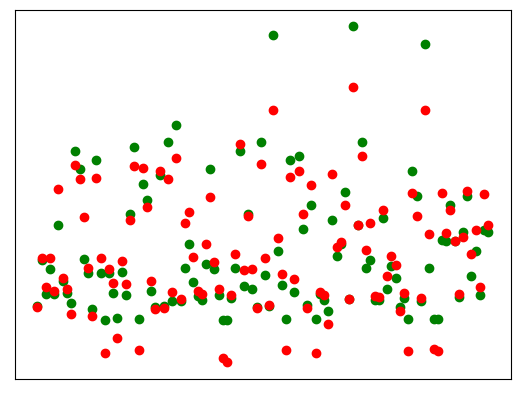

In [19]:
# Make predictions using the training set
y_pred = regr.predict(X_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_train, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train, y_pred))
# Plot outputs
plt.scatter(range(len(y_train)), y_train, color='green')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.xticks(())
plt.yticks(())
plt.show()
